In [1]:
pip install torch torchvision

# 1. Importación de Librerías y Carga de Datos

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Definir transformaciones para los datos
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Cargar los datos de Fashion MNIST
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Verificar el tamaño del dataset
print(f"Tamaño del conjunto de entrenamiento: {len(trainset)}")
print(f"Tamaño del conjunto de prueba: {len(testset)}")


Tamaño del conjunto de entrenamiento: 60000
Tamaño del conjunto de prueba: 10000


## Comentarios:

- Se importan las librerías necesarias para el proyecto.
- Se definen las transformaciones para normalizar los datos.
- Se cargan los datos de Fashion MNIST y se configuran los cargadores de datos para entrenamiento y prueba.
- Se imprime el tamaño del conjunto de entrenamiento y de prueba.


# 2. Definir la Arquitectura del Modelo

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        return output

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Comentarios:
- Se define la clase Net que representa la arquitectura de la red neuronal convolucional.
- Se inicializan las capas convolucionales, las capas totalmente conectadas y las capas de dropout.
- Se define la función forward que especifica cómo los datos pasan a través de la red.
- Se instancia el modelo, se define la función de pérdida y el optimizador.

# 3. Entrenamiento del Modelo

In [4]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:    # Imprimir cada 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.775
Epoch 1, Batch 200, Loss: 0.477
Epoch 1, Batch 300, Loss: 0.416
Epoch 1, Batch 400, Loss: 0.397
Epoch 1, Batch 500, Loss: 0.357
Epoch 1, Batch 600, Loss: 0.340
Epoch 1, Batch 700, Loss: 0.330
Epoch 1, Batch 800, Loss: 0.311
Epoch 1, Batch 900, Loss: 0.303
Epoch 2, Batch 100, Loss: 0.274
Epoch 2, Batch 200, Loss: 0.266
Epoch 2, Batch 300, Loss: 0.270
Epoch 2, Batch 400, Loss: 0.268
Epoch 2, Batch 500, Loss: 0.263
Epoch 2, Batch 600, Loss: 0.261
Epoch 2, Batch 700, Loss: 0.273
Epoch 2, Batch 800, Loss: 0.253
Epoch 2, Batch 900, Loss: 0.256
Epoch 3, Batch 100, Loss: 0.207
Epoch 3, Batch 200, Loss: 0.209
Epoch 3, Batch 300, Loss: 0.214
Epoch 3, Batch 400, Loss: 0.207
Epoch 3, Batch 500, Loss: 0.227
Epoch 3, Batch 600, Loss: 0.214
Epoch 3, Batch 700, Loss: 0.238
Epoch 3, Batch 800, Loss: 0.216
Epoch 3, Batch 900, Loss: 0.226
Epoch 4, Batch 100, Loss: 0.179
Epoch 4, Batch 200, Loss: 0.175
Epoch 4, Batch 300, Loss: 0.183
Epoch 4, Batch 400, Loss: 0.178
Epoch 4,

## Comentarios:

- Se entrena el modelo durante 10 épocas.
- Se itera sobre los datos de entrenamiento, calculando las predicciones y actualizando los pesos del modelo.
- Se imprime la pérdida de entrenamiento cada 100 mini-lotes.

# 4. Evaluación del Modelo

In [5]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

Accuracy on the test set: 91.16%


## Comentarios:

- Se evalúa el modelo en el conjunto de prueba sin calcular gradientes.
- Se calculan las predicciones y se compara con las etiquetas reales para calcular la precisión.
- Se imprime la precisión del modelo en el conjunto de prueba.


# 5. Visualización de Mapas de Activación

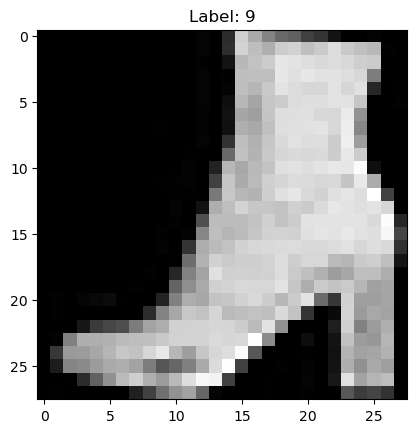

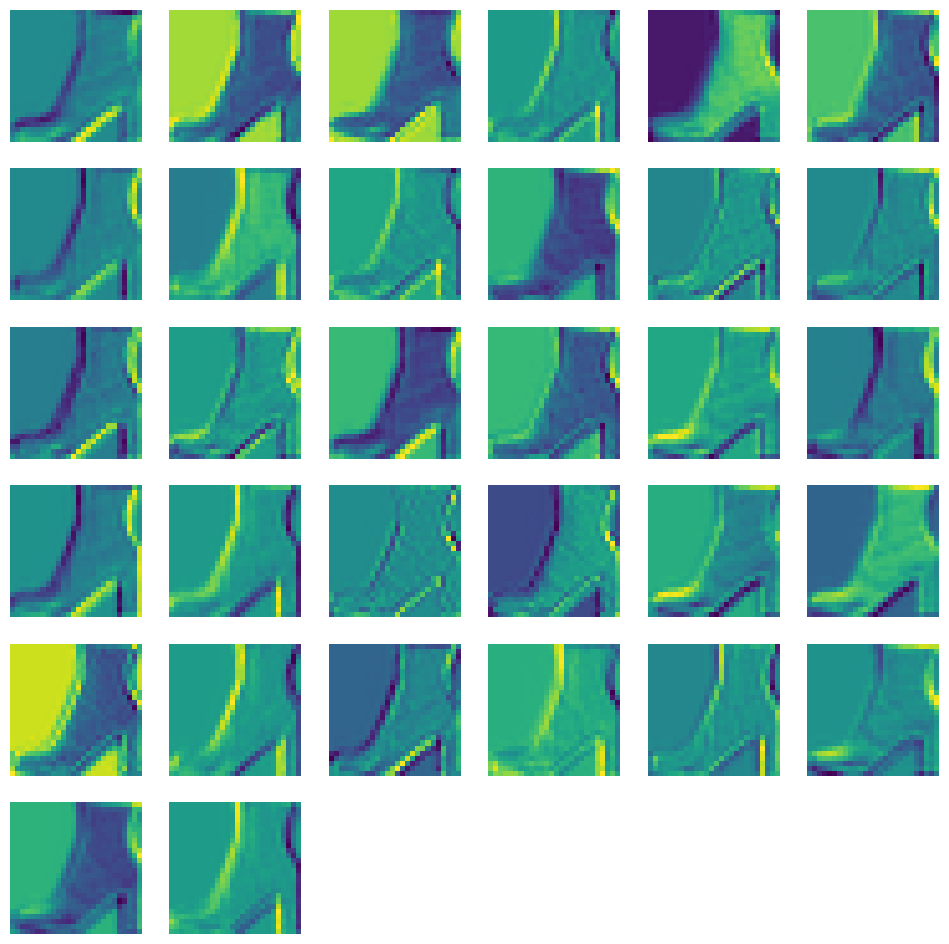

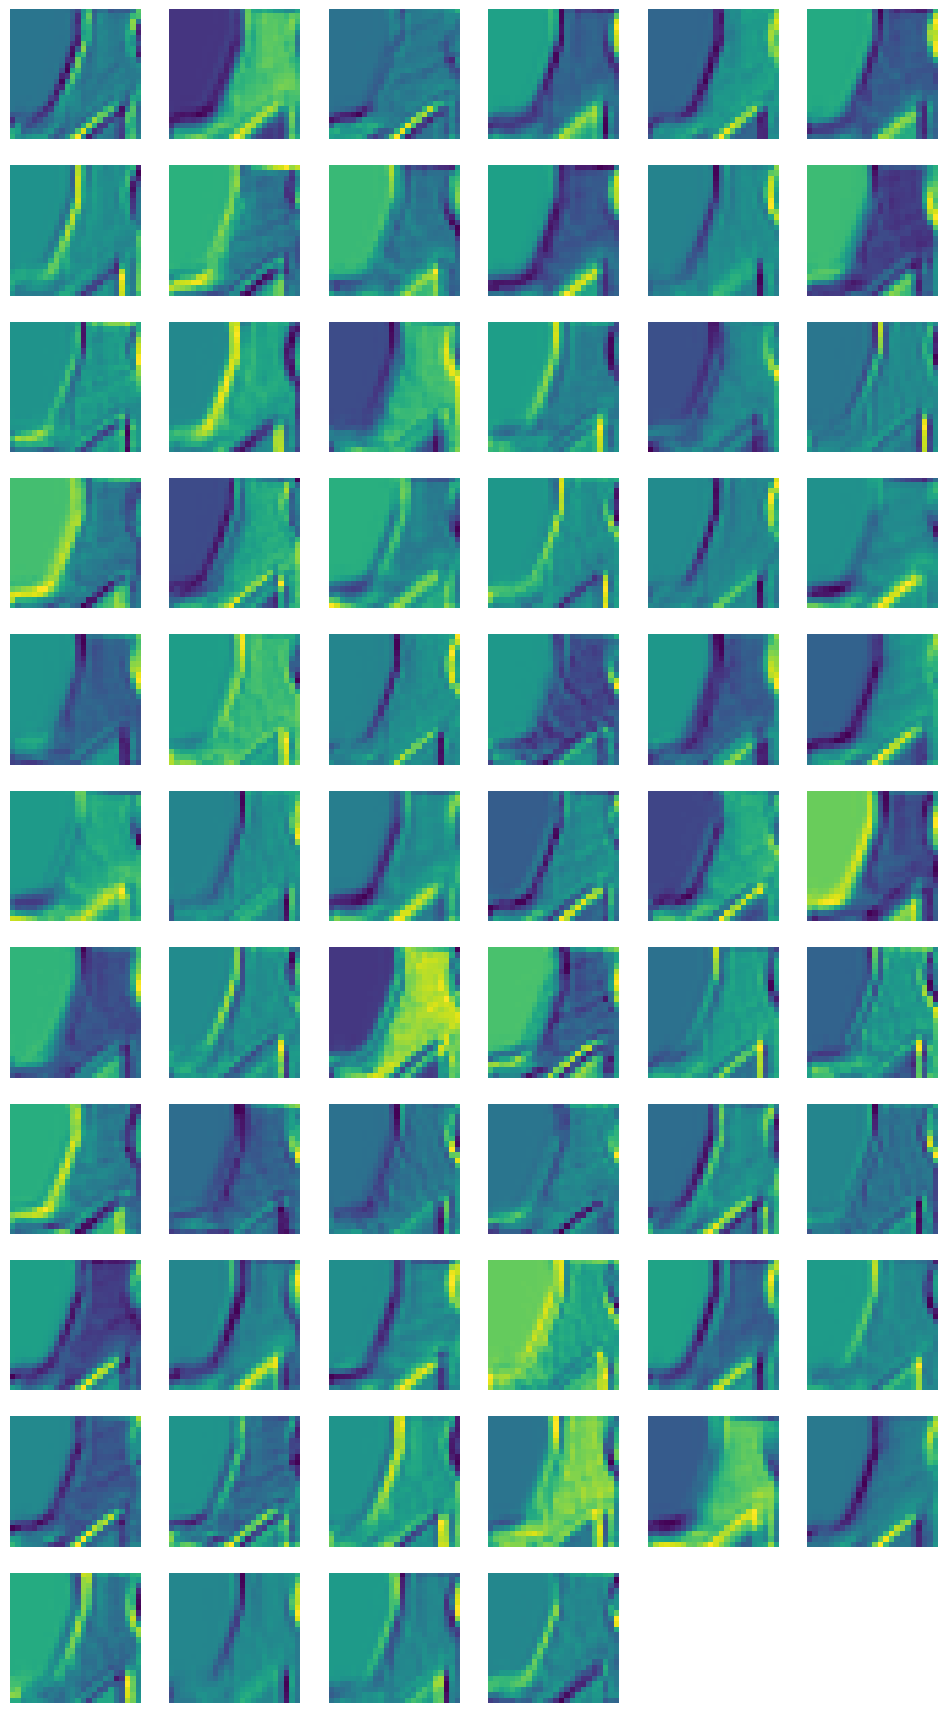

In [13]:
def get_activation(layer, input):
    return layer(input)

# Función para visualizar los mapas de activación
def plot_activations(activation):
    num_activations = activation.shape[1]
    size = activation.shape[2]
    num_cols = 6
    num_rows = num_activations // num_cols + 1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*2, num_rows*2))
    for i, ax in enumerate(axes.flat):
        if i < num_activations:
            img = activation[0, i].detach().numpy()
            ax.imshow(img, cmap='viridis')
        ax.axis('off')
    plt.show()

# Función para visualizar las activaciones de una imagen específica
def visualize_image_activations(image_index):
    # Seleccionar una imagen de prueba
    dataiter = iter(testloader)
    for _ in range(image_index + 1):
        images, labels = next(dataiter)  # Usar la función next() de Python para obtener el siguiente elemento

    test_image = images[0].unsqueeze(0)

    # Mostrar la imagen de prueba
    plt.imshow(test_image[0].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[0].item()}")
    plt.show()

    # Obtener las activaciones de las capas convolucionales
    activations = []
    x = test_image
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            x = get_activation(layer, x)
            activations.append(x)
        elif isinstance(layer, nn.MaxPool2d) or isinstance(layer, nn.ReLU) or isinstance(layer, nn.Dropout):
            x = get_activation(layer, x)
        elif isinstance(layer, nn.Linear):
            break  # Detenerse antes de las capas totalmente conectadas

    # Visualizar los mapas de activación de las capas convolucionales
    plot_activations(activations[0])
    plot_activations(activations[1])

# Llamar a la función con el índice de la imagen que deseas visualizar
visualize_image_activations(111)  # Cambia el índice para visualizar diferentes imágenes


## Comentarios:

- Se define una función get_activation para obtener las activaciones de una capa específica al pasar los datos de entrada.
- La función plot_activations visualiza los mapas de activación de una capa específica.
- Se calcula el número de activaciones, el tamaño de las activaciones y se configuran las subtramas.
- Cada activación se muestra en una subtrama utilizando el mapa de colores 'viridis'.
- La función visualize_image_activations toma un índice (image_index) como argumento para seleccionar y visualizar una imagen específica del conjunto de datos de prueba.
- Se selecciona una imagen del DataLoader y se visualiza.
- Se pasan los datos a través de las capas convolucionales del modelo para obtener las activaciones.
- Las activaciones de las capas convolucionales se visualizan utilizando la función plot_activations.
- Llama a la función visualize_image_activations con el índice de la imagen que deseas visualizar.
- Cambia el valor del índice para visualizar diferentes imágenes del conjunto de datos de prueba.